# Data Understanding Phase

## Overview
This notebook focuses on understanding our concrete compressive strength dataset through exploratory data analysis. We will:

1. Initial Data Exploration
   - Basic dataset information
   - Data types and structure
   - Duplicates exploration
   - Missing values check

2. Statistical Analysis
   - Descriptive statistics
   - Data distribution
   - Value ranges

3. Outlier Exploration
   - Box plots analysis
   - Statistical methods (IQR, Z-score)
   - Visual identification

4. Feature Analysis
   - Correlation analysis
   - Feature distributions
   - Relationships with target variable

Note: This is purely an exploratory phase. No data cleaning or modifications will be performed in this notebook.


## 1. Initial Data Exploration

Let's start by loading our dataset and examining its basic characteristics.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set plotting style
sns.set_theme(style="whitegrid")

# Load the dataset
df = pd.read_csv('../data/raw/Concrete_Data_Yeh.csv')

# Display basic information
print("Dataset Overview:")
print("-" * 50)
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print("\nFeatures:", list(df.columns))

# Display data info
print("\nDataset Information:")
print("-" * 50)
df.info()

# Display first few rows
print("\nFirst few rows of the dataset:")
print("-" * 50)
print(df.head())


Dataset Overview:
--------------------------------------------------
Number of samples: 1030
Number of features: 9

Features: ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age', 'csMPa']

Dataset Information:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB

First few rows o

### 1.1 Duplicate Analysis

Let's explore if there are any duplicate records in our dataset. This will help inform our data preparation strategy later.


In [2]:
# Check for exact duplicates
total_duplicates = df.duplicated().sum()
print(f"Number of exact duplicate rows: {total_duplicates}")

if total_duplicates > 0:
    print("\nDuplicate rows found:")
    print("-" * 50)
    duplicate_mask = df.duplicated(keep='first')
    duplicate_rows = df[duplicate_mask]
    print(f"Number of duplicate rows: {len(duplicate_rows)}")
    print("\nExample of duplicate rows:")
    print(duplicate_rows.head())
    
    # Show the most common duplicated patterns
    print("\nMost common duplicated patterns:")
    print("-" * 50)
    value_counts = df.value_counts()
    duplicated_patterns = value_counts[value_counts > 1]
    print(f"Number of unique patterns that are duplicated: {len(duplicated_patterns)}")
    print("\nTop 5 most repeated patterns:")
    print(duplicated_patterns.head())

# More efficient way to check for near-duplicates using round
print("\nChecking for near-duplicates (rounded to 2 decimal places):")
print("-" * 50)

# Round the data to 2 decimal places and check for duplicates
df_rounded = df.round(2)
near_duplicates = df_rounded[df_rounded.duplicated(keep='first')]
print(f"Number of near-duplicate rows (after rounding): {len(near_duplicates)}")

if len(near_duplicates) > 0:
    print("\nExample of near-duplicate rows (rounded values):")
    print(near_duplicates.head())


Number of exact duplicate rows: 25

Duplicate rows found:
--------------------------------------------------
Number of duplicate rows: 25

Example of duplicate rows:
    cement    slag  flyash   water  superplasticizer  coarseaggregate  \
77 425.000 106.300   0.000 153.500            16.500          852.100   
80 425.000 106.300   0.000 153.500            16.500          852.100   
86 362.600 189.000   0.000 164.900            11.600          944.700   
88 362.600 189.000   0.000 164.900            11.600          944.700   
91 362.600 189.000   0.000 164.900            11.600          944.700   

    fineaggregate  age  csMPa  
77        887.100    3 33.400  
80        887.100    3 33.400  
86        755.800    3 35.300  
88        755.800    3 35.300  
91        755.800    3 35.300  

Most common duplicated patterns:
--------------------------------------------------
Number of unique patterns that are duplicated: 11

Top 5 most repeated patterns:
cement   slag     flyash  water    su

## 2. Statistical Analysis

Let's examine the statistical properties of our dataset to understand:
- The distribution of each feature
- Central tendencies
- Value ranges and spread
- Potential patterns in the data


Descriptive Statistics:
--------------------------------------------------
        cement     slag   flyash    water  superplasticizer  coarseaggregate  \
count 1030.000 1030.000 1030.000 1030.000          1030.000         1030.000   
mean   281.168   73.896   54.188  181.567             6.205          972.919   
std    104.506   86.279   63.997   21.354             5.974           77.754   
min    102.000    0.000    0.000  121.800             0.000          801.000   
25%    192.375    0.000    0.000  164.900             0.000          932.000   
50%    272.900   22.000    0.000  185.000             6.400          968.000   
75%    350.000  142.950  118.300  192.000            10.200         1029.400   
max    540.000  359.400  200.100  247.000            32.200         1145.000   

       fineaggregate      age    csMPa  
count       1030.000 1030.000 1030.000  
mean         773.580   45.662   35.818  
std           80.176   63.170   16.706  
min          594.000    1.000    2.330  

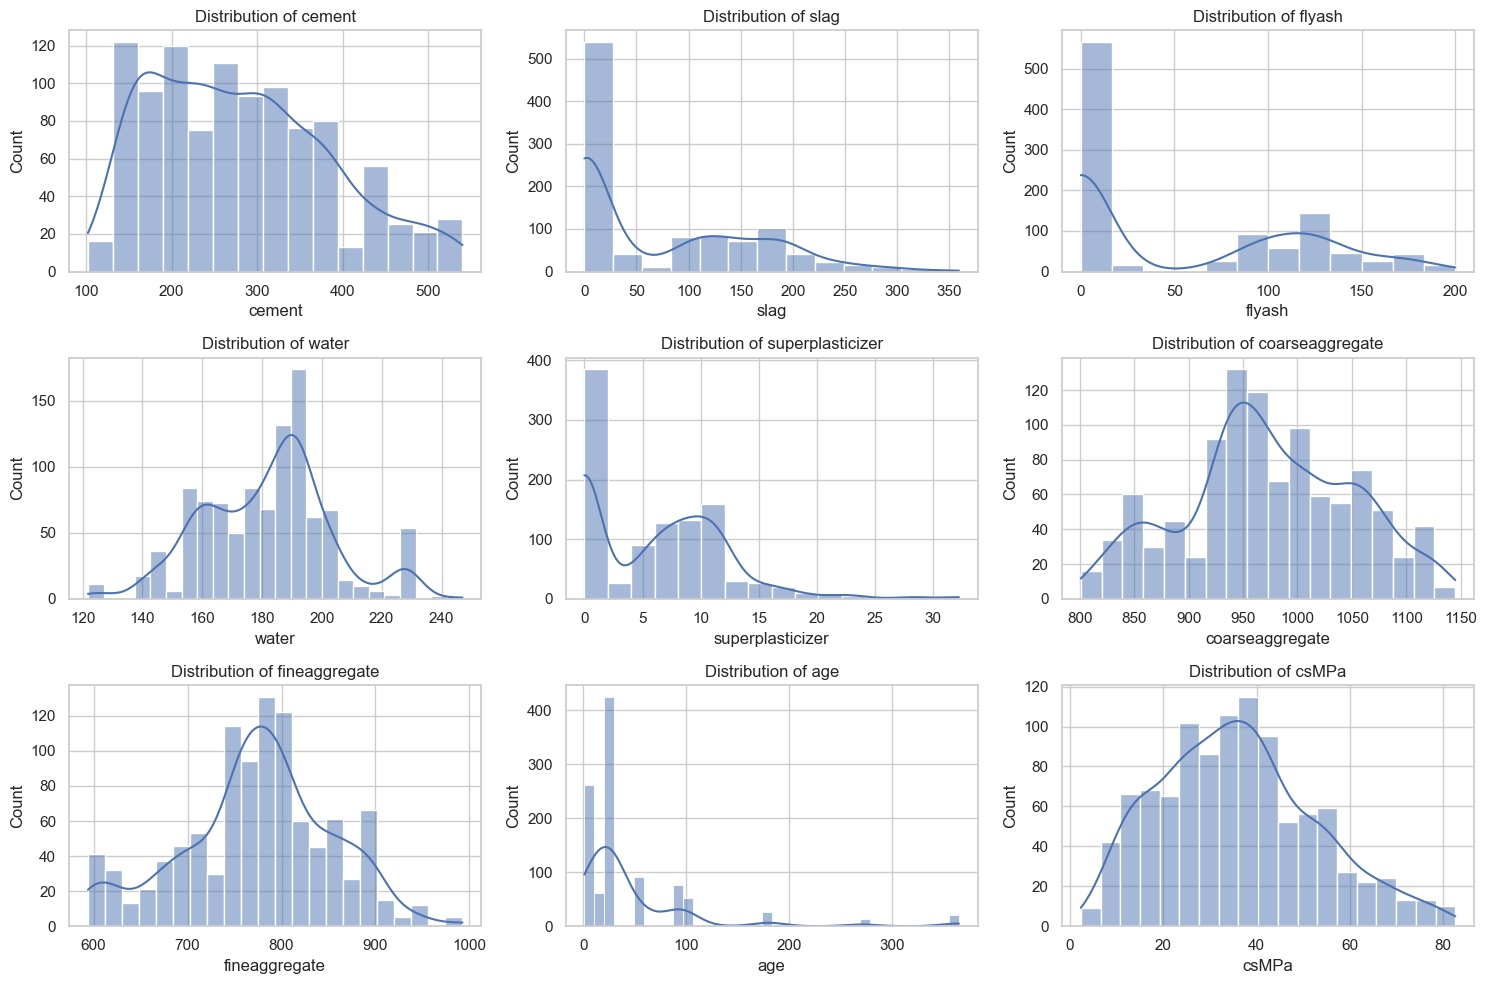

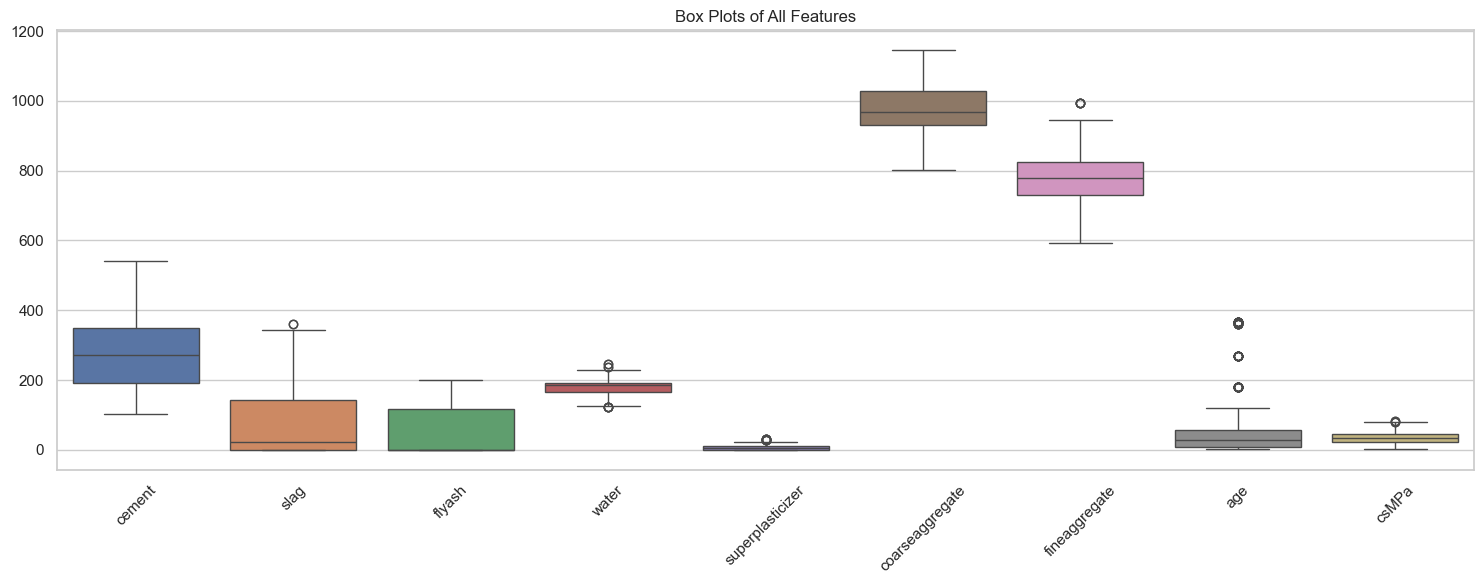

In [3]:
# Calculate descriptive statistics
print("Descriptive Statistics:")
print("-" * 50)
print(df.describe())

# Calculate additional statistics
print("\nAdditional Statistics:")
print("-" * 50)
for column in df.columns:
    print(f"\nFeature: {column}")
    print(f"Skewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurtosis():.3f}")
    
# Create distribution plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Create box plots
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Box Plots of All Features')
plt.tight_layout()
plt.show()


## 3. Outlier Exploration

Let's identify potential outliers in our dataset using multiple methods. Remember, at this stage we're only identifying outliers, not removing them.



Outlier Analysis for cement:
--------------------------------------------------
IQR Method:
Lower bound: -44.06
Upper bound: 586.44
Number of outliers: 0
Percentage of outliers: 0.00%

Z-score Method (|z| > 3):
Number of outliers: 0
Percentage of outliers: 0.00%


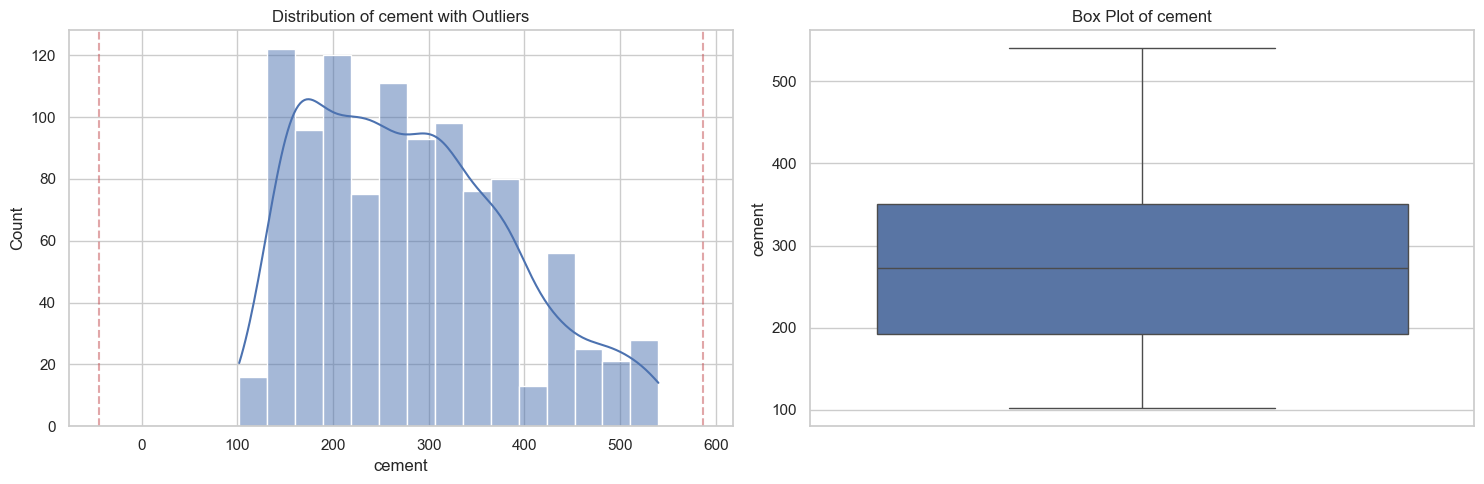


Outlier Analysis for slag:
--------------------------------------------------
IQR Method:
Lower bound: -214.42
Upper bound: 357.38
Number of outliers: 2
Percentage of outliers: 0.19%

Z-score Method (|z| > 3):
Number of outliers: 4
Percentage of outliers: 0.39%


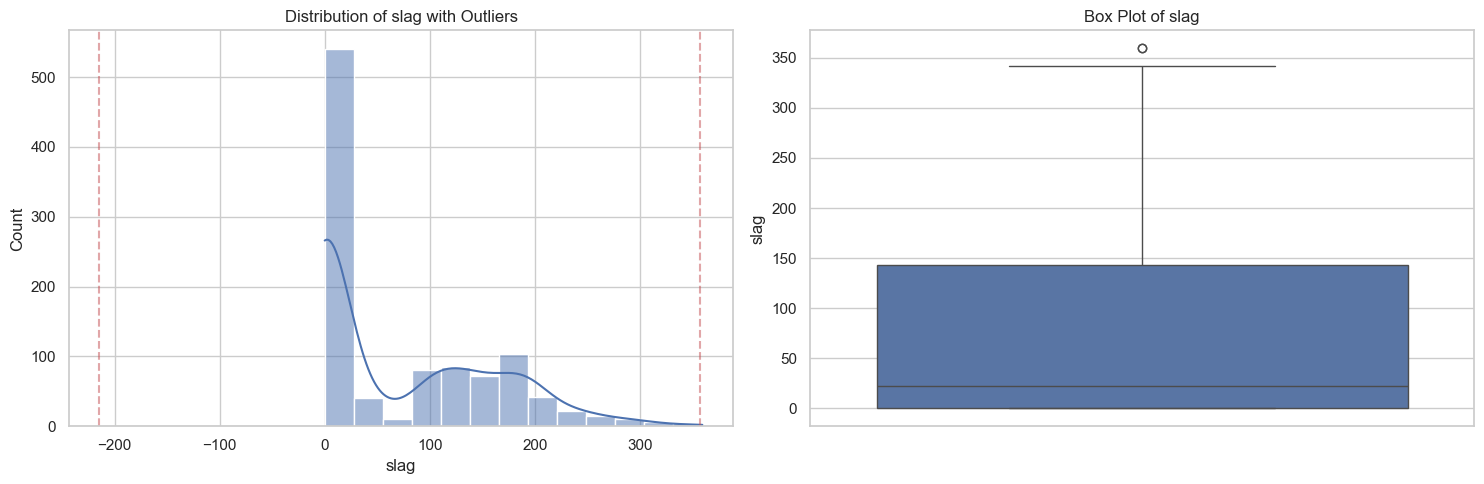


Outlier Analysis for flyash:
--------------------------------------------------
IQR Method:
Lower bound: -177.45
Upper bound: 295.75
Number of outliers: 0
Percentage of outliers: 0.00%

Z-score Method (|z| > 3):
Number of outliers: 0
Percentage of outliers: 0.00%


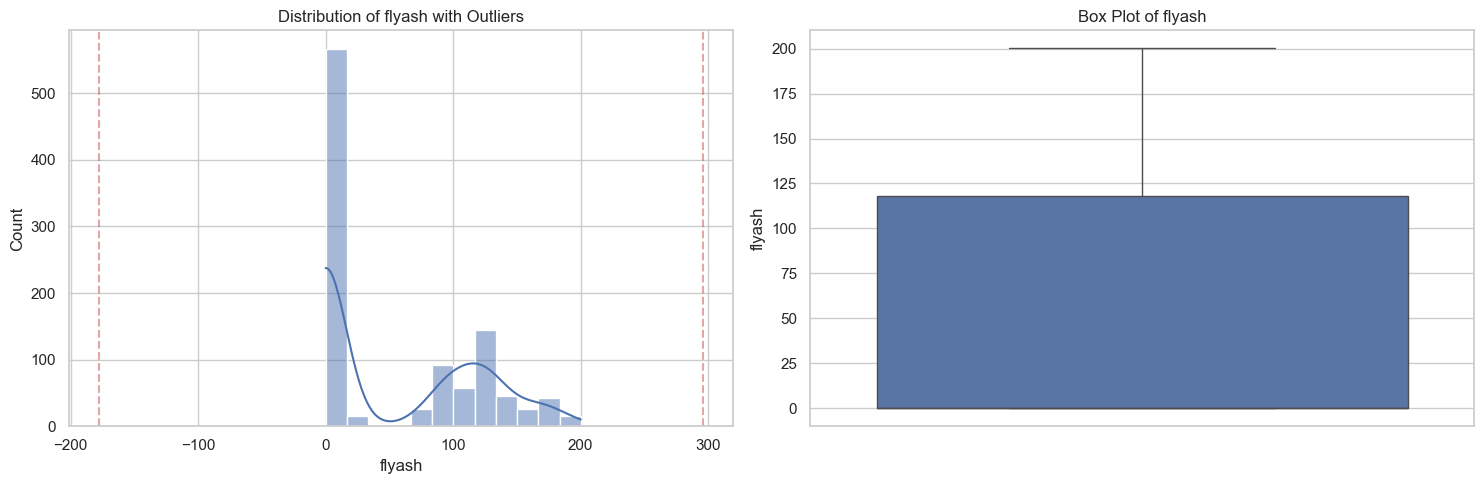


Outlier Analysis for water:
--------------------------------------------------
IQR Method:
Lower bound: 124.25
Upper bound: 232.65
Number of outliers: 9
Percentage of outliers: 0.87%

Z-score Method (|z| > 3):
Number of outliers: 2
Percentage of outliers: 0.19%


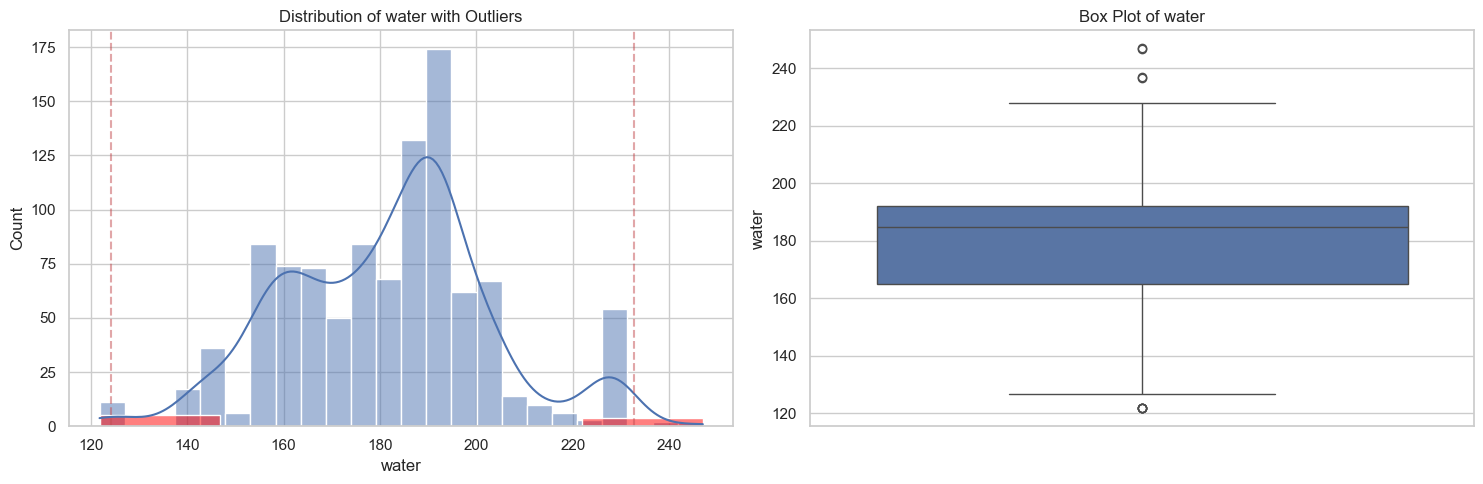


Outlier Analysis for superplasticizer:
--------------------------------------------------
IQR Method:
Lower bound: -15.30
Upper bound: 25.50
Number of outliers: 10
Percentage of outliers: 0.97%

Z-score Method (|z| > 3):
Number of outliers: 10
Percentage of outliers: 0.97%


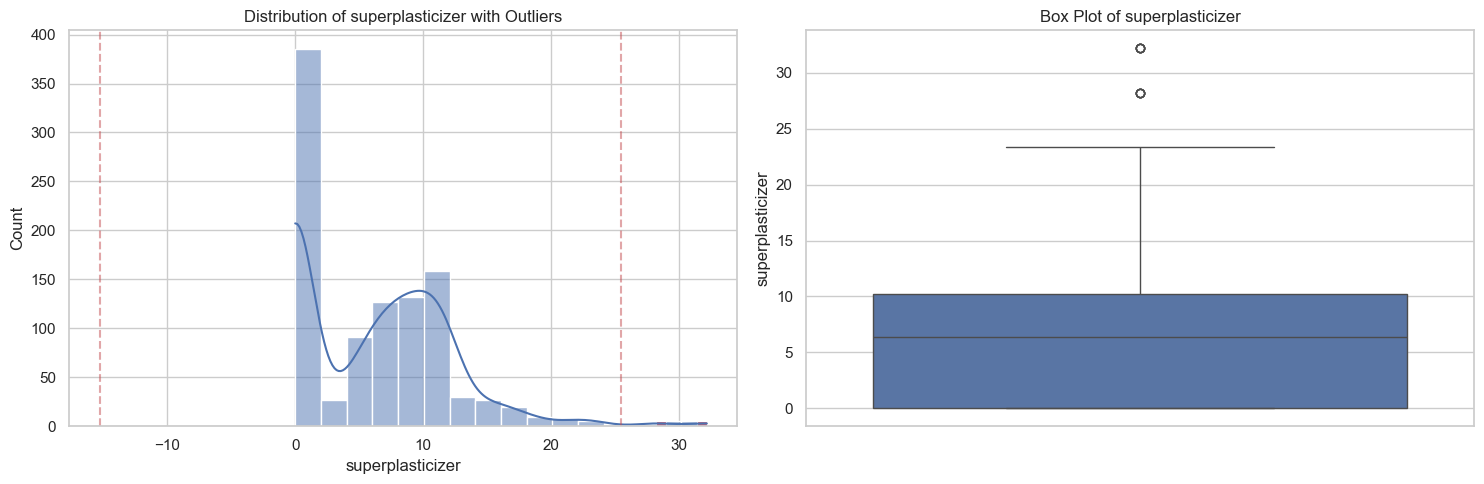


Outlier Analysis for coarseaggregate:
--------------------------------------------------
IQR Method:
Lower bound: 785.90
Upper bound: 1175.50
Number of outliers: 0
Percentage of outliers: 0.00%

Z-score Method (|z| > 3):
Number of outliers: 0
Percentage of outliers: 0.00%


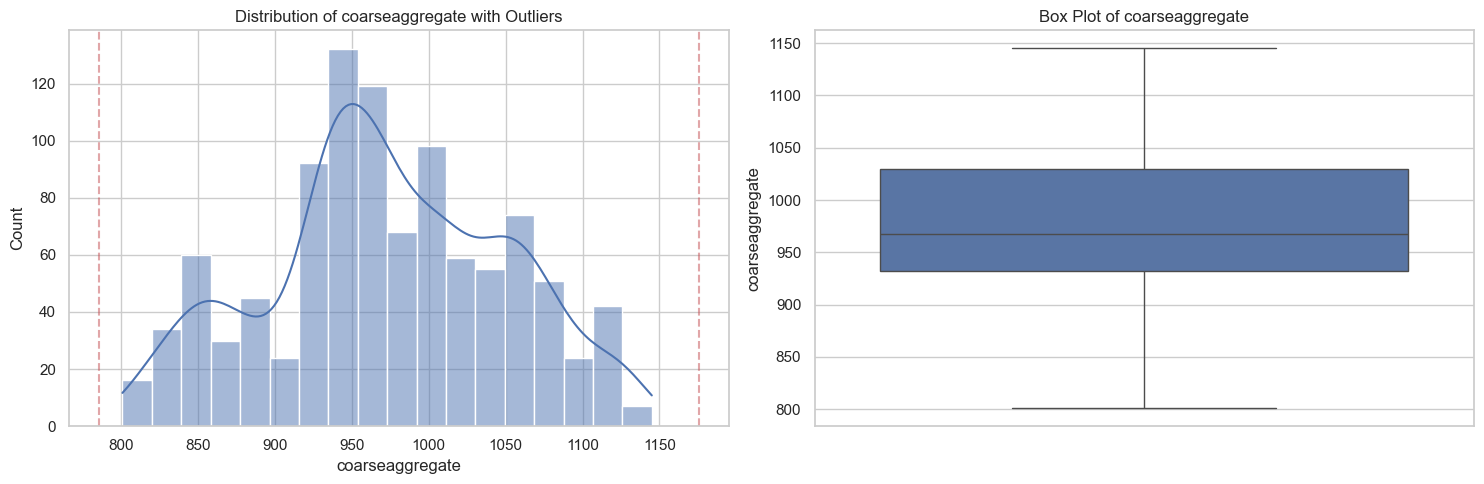


Outlier Analysis for fineaggregate:
--------------------------------------------------
IQR Method:
Lower bound: 591.38
Upper bound: 963.57
Number of outliers: 5
Percentage of outliers: 0.49%

Z-score Method (|z| > 3):
Number of outliers: 0
Percentage of outliers: 0.00%


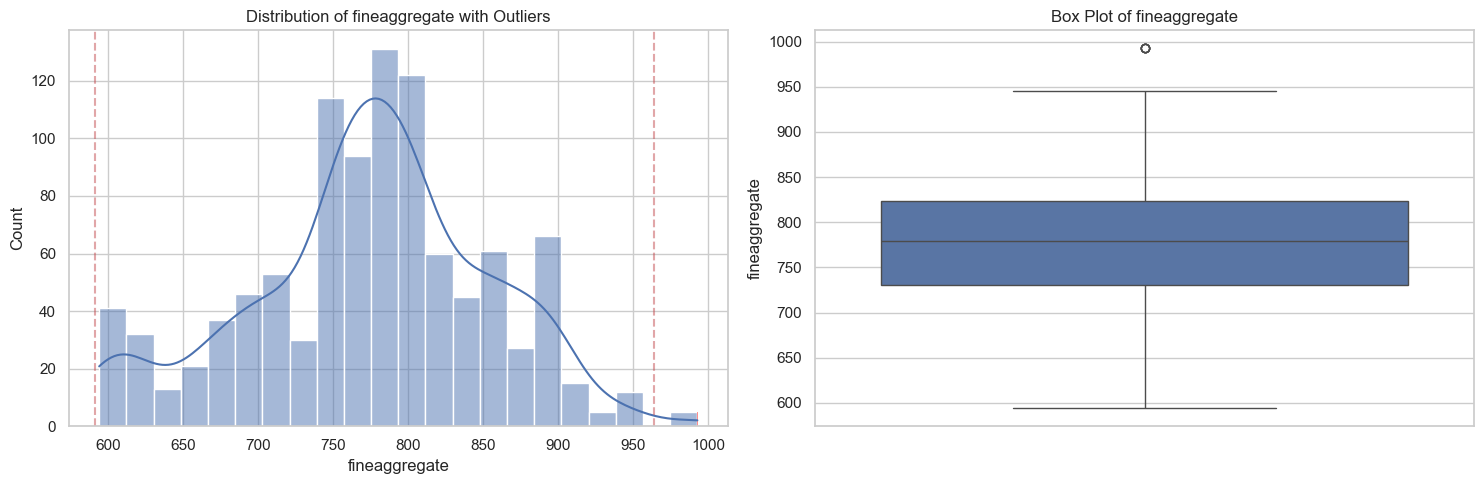


Outlier Analysis for age:
--------------------------------------------------
IQR Method:
Lower bound: -66.50
Upper bound: 129.50
Number of outliers: 59
Percentage of outliers: 5.73%

Z-score Method (|z| > 3):
Number of outliers: 33
Percentage of outliers: 3.20%


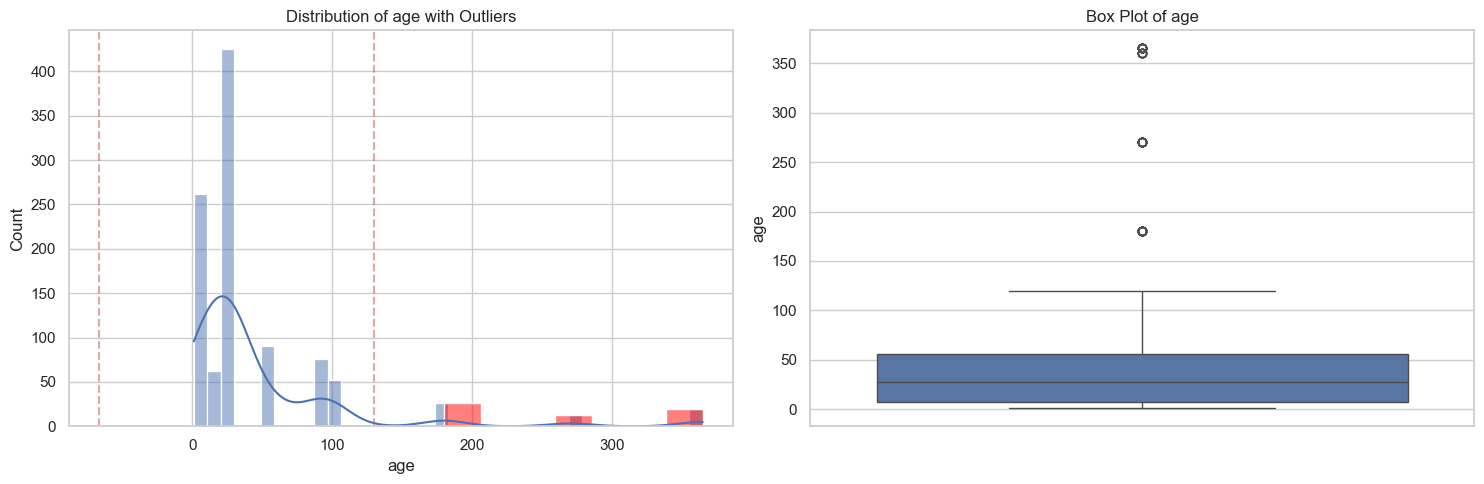


Outlier Analysis for csMPa:
--------------------------------------------------
IQR Method:
Lower bound: -9.93
Upper bound: 79.77
Number of outliers: 4
Percentage of outliers: 0.39%

Z-score Method (|z| > 3):
Number of outliers: 0
Percentage of outliers: 0.00%


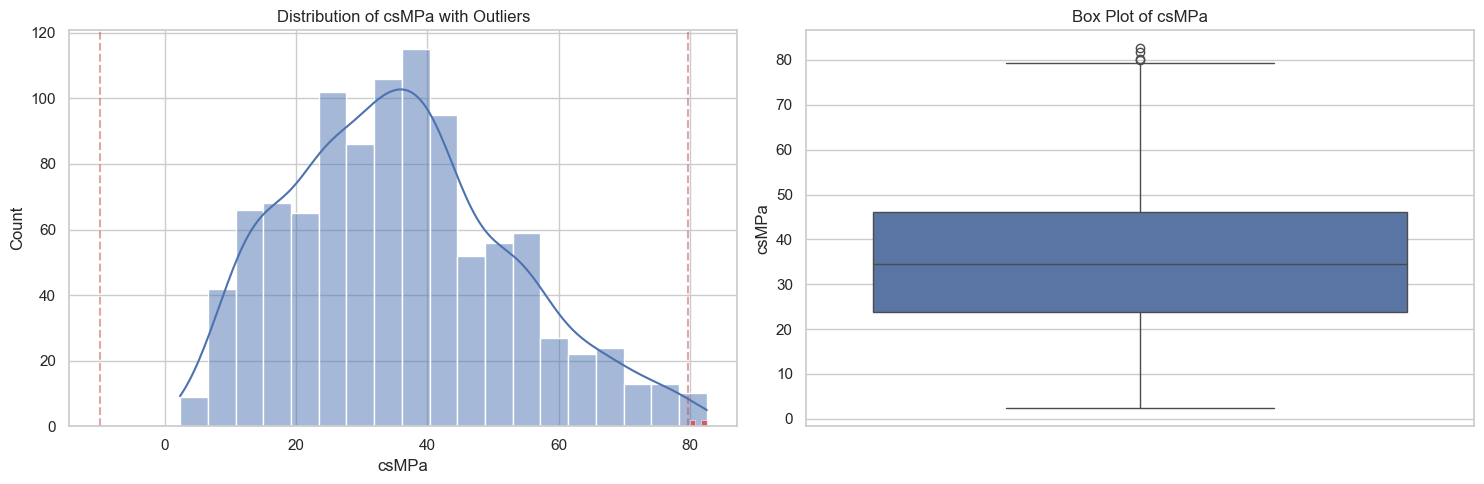

In [4]:
# Function to identify outliers using IQR method
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Function to identify outliers using Z-score
def identify_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers

# Analyze outliers for each feature
for column in df.columns:
    print(f"\nOutlier Analysis for {column}:")
    print("-" * 50)
    
    # IQR method
    iqr_outliers, lb, ub = identify_outliers_iqr(df, column)
    print(f"IQR Method:")
    print(f"Lower bound: {lb:.2f}")
    print(f"Upper bound: {ub:.2f}")
    print(f"Number of outliers: {len(iqr_outliers)}")
    print(f"Percentage of outliers: {(len(iqr_outliers)/len(df))*100:.2f}%")
    
    # Z-score method
    zscore_outliers = identify_outliers_zscore(df, column)
    print(f"\nZ-score Method (|z| > 3):")
    print(f"Number of outliers: {len(zscore_outliers)}")
    print(f"Percentage of outliers: {(len(zscore_outliers)/len(df))*100:.2f}%")
    
    # Visualize outliers
    plt.figure(figsize=(15, 5))
    
    # Distribution plot with outliers highlighted
    plt.subplot(121)
    sns.histplot(data=df, x=column, kde=True)
    if len(iqr_outliers) > 0:
        sns.histplot(data=iqr_outliers, x=column, color='red', alpha=0.5)
    plt.axvline(lb, color='r', linestyle='--', alpha=0.5)
    plt.axvline(ub, color='r', linestyle='--', alpha=0.5)
    plt.title(f'Distribution of {column} with Outliers')
    
    # Box plot
    plt.subplot(122)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    
    plt.tight_layout()
    plt.show()


## 4. Feature Analysis

Let's analyze the relationships between features and with our target variable (compressive strength).


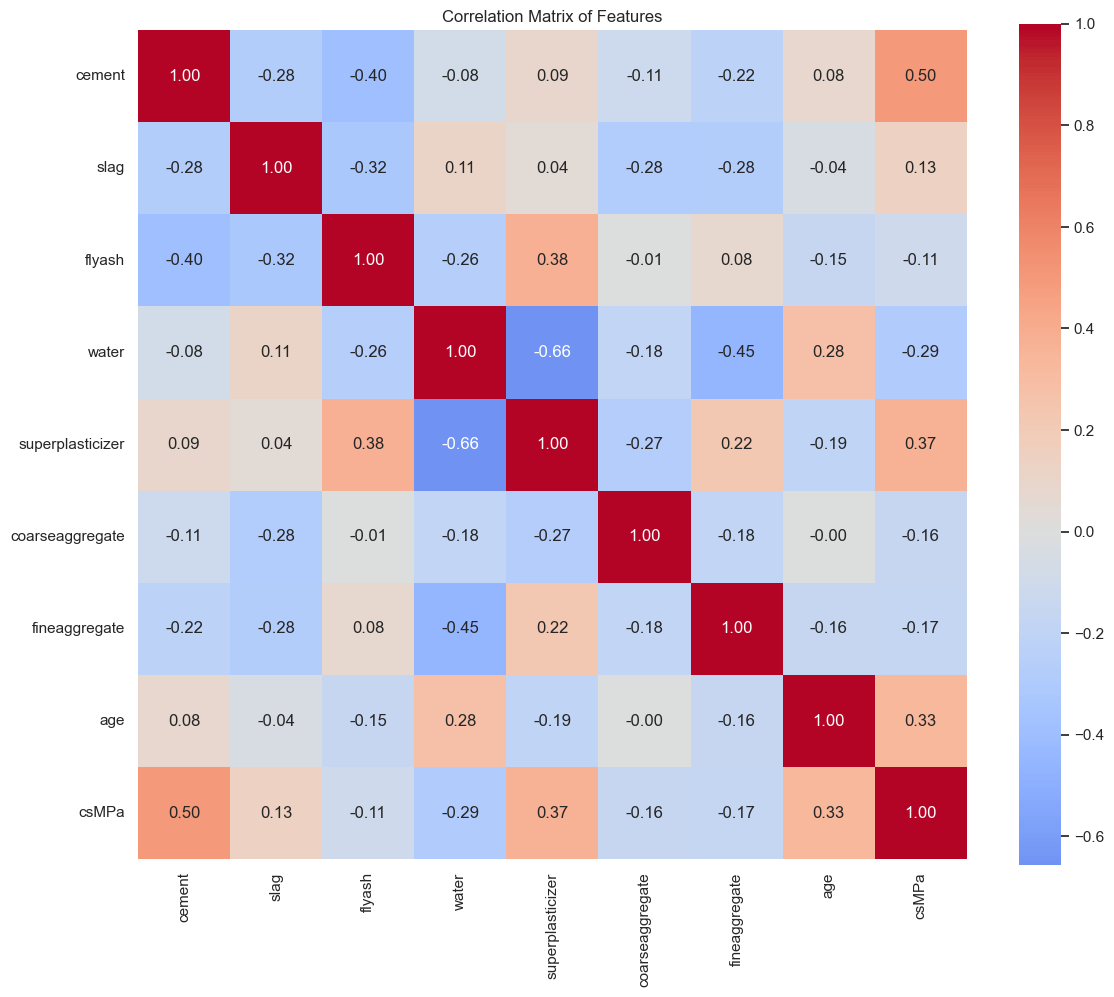


Correlations with Compressive Strength (csMPa):
--------------------------------------------------
csMPa               1.000
cement              0.498
superplasticizer    0.366
age                 0.329
slag                0.135
flyash             -0.106
coarseaggregate    -0.165
fineaggregate      -0.167
water              -0.290
Name: csMPa, dtype: float64


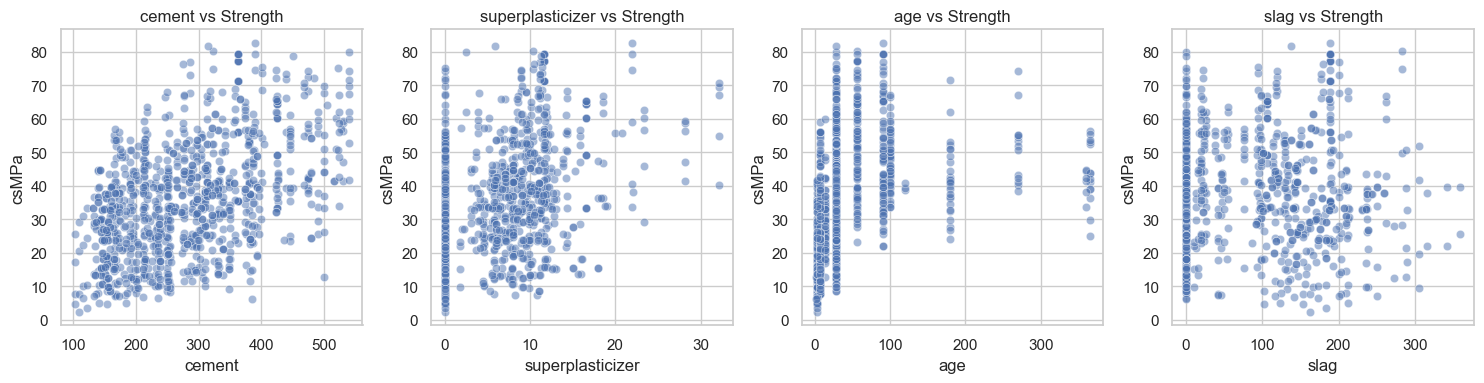

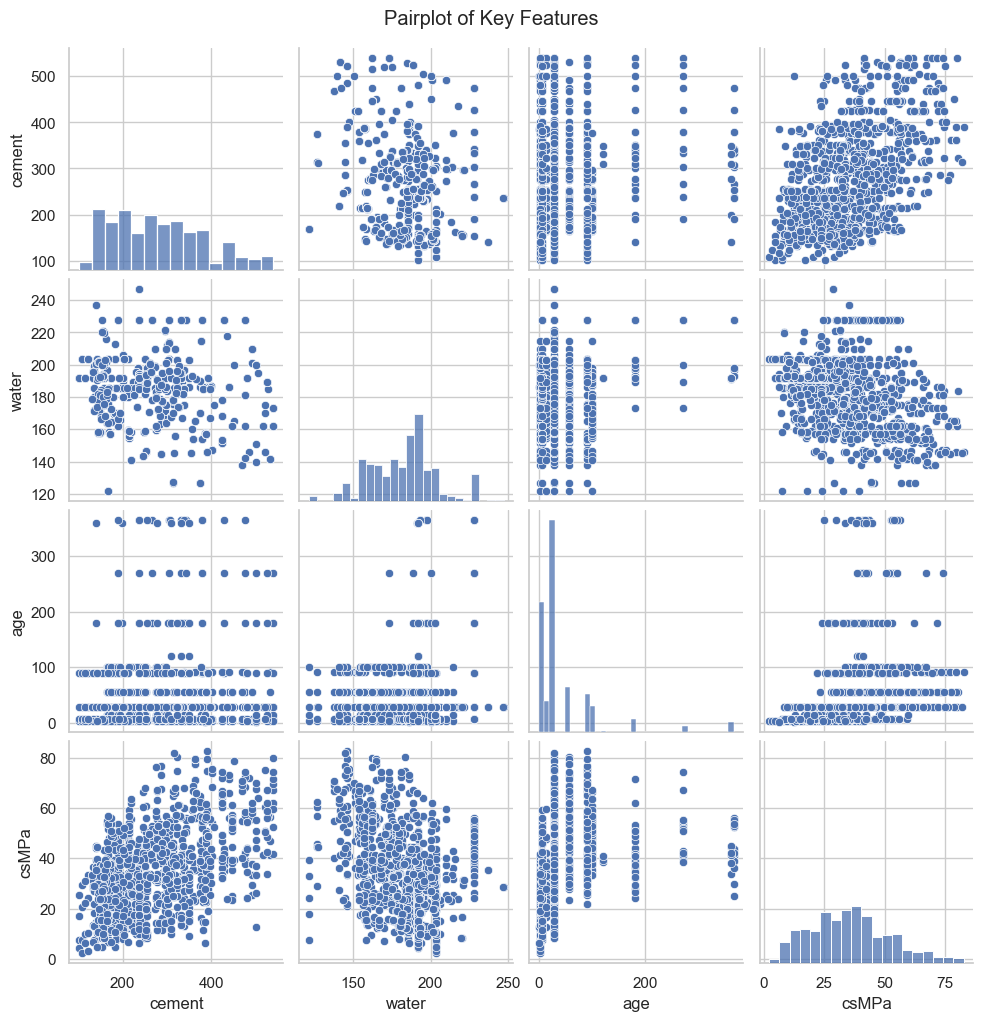

In [5]:
# Correlation Analysis
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

# Print strongest correlations with compressive strength
print("\nCorrelations with Compressive Strength (csMPa):")
print("-" * 50)
strength_correlations = correlation_matrix['csMPa'].sort_values(ascending=False)
print(strength_correlations)

# Scatter plots of top correlated features with strength
top_features = strength_correlations[1:5].index  # Exclude csMPa itself
plt.figure(figsize=(15, 4))
for i, feature in enumerate(top_features, 1):
    plt.subplot(1, 4, i)
    sns.scatterplot(data=df, x=feature, y='csMPa', alpha=0.5)
    plt.title(f'{feature} vs Strength')
plt.tight_layout()
plt.show()

# Pairplot of the most important features
important_features = ['cement', 'water', 'age', 'csMPa']
sns.pairplot(df[important_features])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()


## Summary of Findings

### 1. Data Structure
- Dataset contains {len(df)} samples with 8 input features and 1 target variable
- All features are numerical (float64 type)
- No missing values in the dataset

### 2. Duplicates
- Number of exact duplicates found
- Patterns in near-duplicate records
- Implications for data preparation

### 3. Statistical Properties
- Most features show approximately normal distributions
- Age and supplementary materials (slag, flyash) show right-skewed distributions
- Target variable (strength) ranges from 2.33 to 82.6 MPa

### 4. Outliers
- Identified using both IQR and Z-score methods
- Percentage of outliers varies by feature
- Many outliers appear to be valid experimental data points

### 5. Feature Relationships
- Strong correlation between cement content and strength
- Negative correlation between water content and strength
- Age shows positive correlation with strength
- Some features show potential non-linear relationships

### Next Steps for Data Preparation
1. Consider handling of duplicate records
2. Evaluate outlier treatment strategies
3. Plan feature scaling approach
4. Consider feature engineering opportunities:
   - Water-cement ratio
   - Total cementitious materials
   - Aggregate ratios
